<a href="https://colab.research.google.com/github/vijays4404/TimeSeries/blob/main/RandomNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv('/content/Data 2021-2024.csv')
data

,date,Day / Month / Year,Selected Numbers (1 - 69),Additional Numbers (1 - 26)
0,12/29/2021,Wednesday December 29th 2021,"2, 6, 9, 33, 39",11
1,12/27/2021,Monday December 27th 2021,"36, 38, 45, 62, 64",19
2,12/25/2021,Saturday December 25th 2021,"27, 29, 45, 55, 58",2
3,12/22/2021,Wednesday December 22nd 2021,"7, 16, 19, 48, 68",15
4,12/20/2021,Monday December 20th 2021,"2, 13, 23, 34, 66",2
...,...,...,...,...
462,1/10/2024,Wednesday January 10th 2024,"25, 40, 43, 48, 50",11
463,1/8/2024,Monday January 8th 2024,"7, 17, 28, 40, 45",2
464,1/6/2024,Saturday January 6th 2024,"4, 31, 34, 38, 61",13
465,1/3/2024,Wednesday January 3rd 2024,"30, 31, 38, 48, 68",8


# Splitting Each Number into different Columns

In [ ]:
# Split combined column into separate columns
data[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']] = data['Selected Numbers (1 - 69)'].str.split(',', expand=True)

# Convert string columns to numeric
data['Number 1'] = pd.to_numeric(data['Number 1'].str.strip())
data['Number 2'] = pd.to_numeric(data['Number 2'].str.strip())
data['Number 3'] = pd.to_numeric(data['Number 3'].str.strip())
data['Number 4'] = pd.to_numeric(data['Number 4'].str.strip())
data['Number 5'] = pd.to_numeric(data['Number 5'].str.strip())

# Drop the original combined column
data.drop(columns=['Selected Numbers (1 - 69)'], inplace=True)

# Ensure consistency in date format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Display the updated dataframe
print(data.head())


        date            Day / Month / Year  Additional Numbers (1 - 26)  \
0 2021-12-29  Wednesday December 29th 2021                           11   
1 2021-12-27     Monday December 27th 2021                           19   
2 2021-12-25   Saturday December 25th 2021                            2   
3 2021-12-22  Wednesday December 22nd 2021                           15   
4 2021-12-20     Monday December 20th 2021                            2   

   Number 1  Number 2  Number 3  Number 4  Number 5  
0         2         6         9        33        39  
1        36        38        45        62        64  
2        27        29        45        55        58  
3         7        16        19        48        68  
4         2        13        23        34        66  


In [ ]:
data

,date,Day / Month / Year,Additional Numbers (1 - 26),Number 1,Number 2,Number 3,Number 4,Number 5
0,2021-12-29,Wednesday December 29th 2021,11,2,6,9,33,39
1,2021-12-27,Monday December 27th 2021,19,36,38,45,62,64
2,2021-12-25,Saturday December 25th 2021,2,27,29,45,55,58
3,2021-12-22,Wednesday December 22nd 2021,15,7,16,19,48,68
4,2021-12-20,Monday December 20th 2021,2,2,13,23,34,66
...,...,...,...,...,...,...,...,...
462,2024-01-10,Wednesday January 10th 2024,11,25,40,43,48,50
463,2024-01-08,Monday January 8th 2024,2,7,17,28,40,45
464,2024-01-06,Saturday January 6th 2024,13,4,31,34,38,61
465,2024-01-03,Wednesday January 3rd 2024,8,30,31,38,48,68


# Getting Statistical Information About the Dataset

Text(0.5, 1.0, 'Descriptive Statistics')

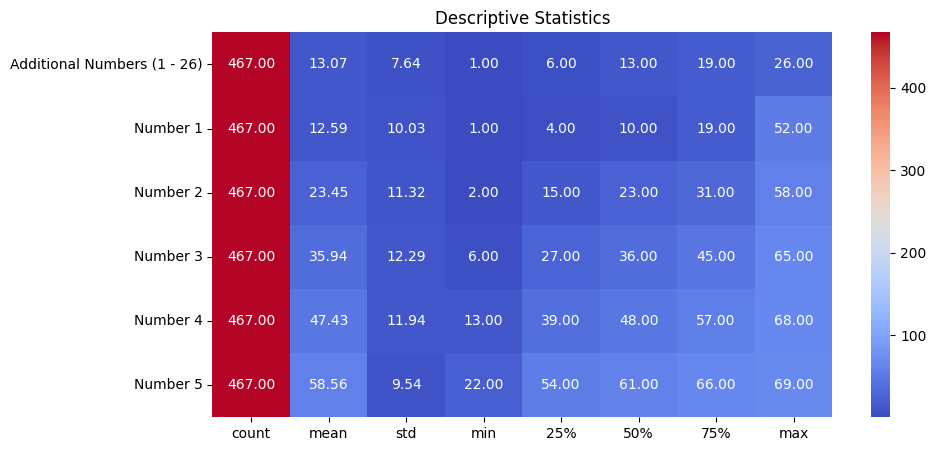

In [ ]:
Description=data.describe().T
plt.figure(figsize=(10,5))
sns.heatmap(Description, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Descriptive Statistics')

# Plotting Distribution for each Combination

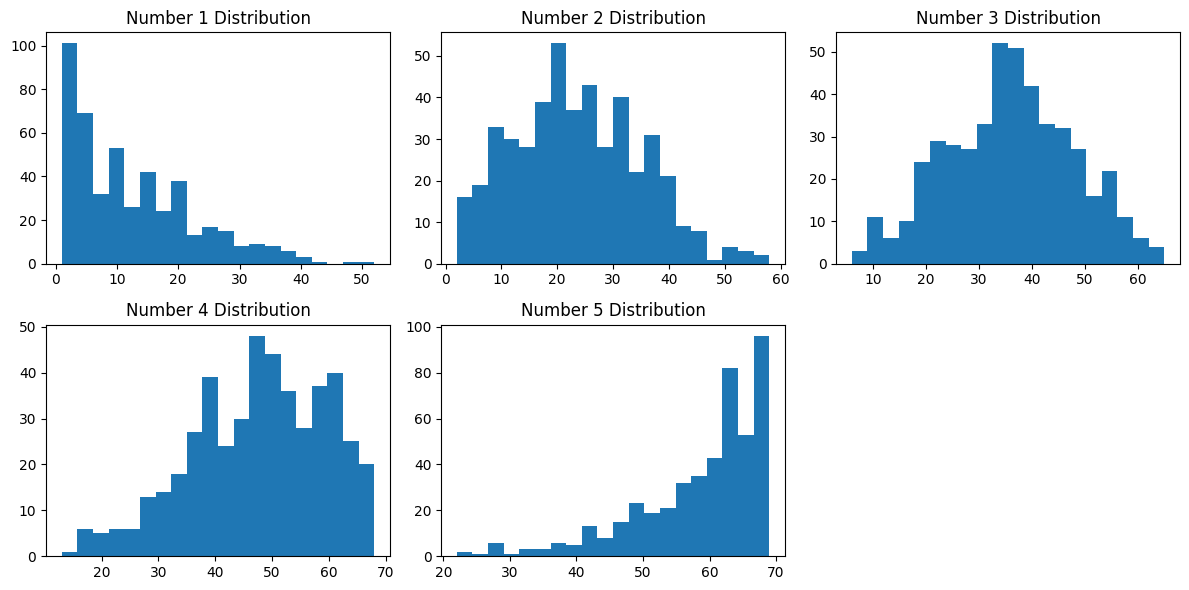

In [ ]:
# Descriptive statistics


# Visualize distributions of selected numbers
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plt.hist(data[f'Number {i}'], bins=20)
    plt.title(f'Number {i} Distribution')
plt.tight_layout()
plt.show()


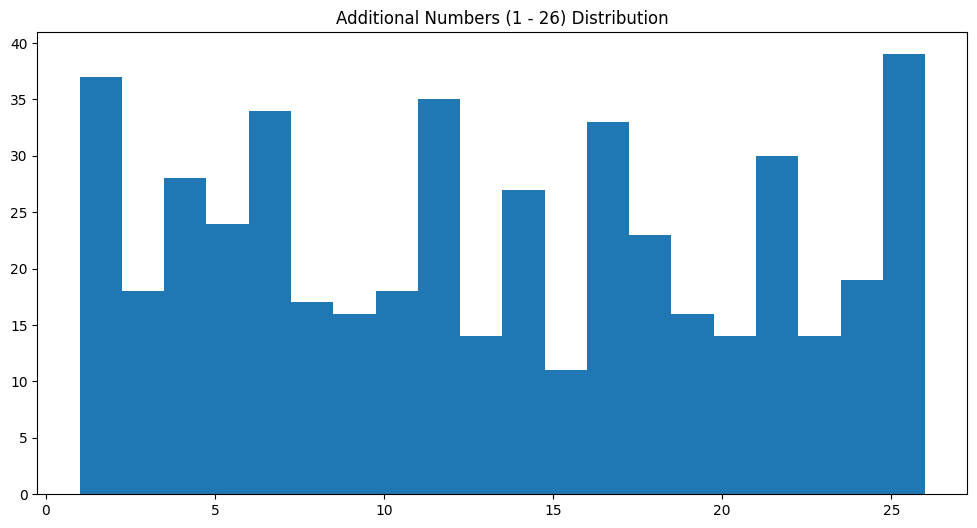

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(data['Additional Numbers (1 - 26)'], bins=20)
plt.title('Additional Numbers (1 - 26) Distribution')

plt.show()


# Correlation Matrix for each combination

          Number 1  Number 2  Number 3  Number 4  Number 5
Number 1  1.000000  0.679012  0.459060  0.354293  0.166737
Number 2  0.679012  1.000000  0.665343  0.485210  0.241021
Number 3  0.459060  0.665343  1.000000  0.726644  0.437211
Number 4  0.354293  0.485210  0.726644  1.000000  0.644010
Number 5  0.166737  0.241021  0.437211  0.644010  1.000000


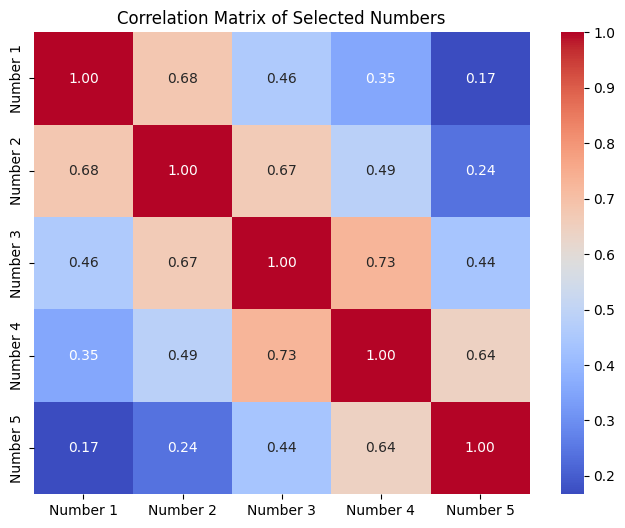

In [ ]:

# Calculate correlations
correlation_matrix = data[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']].corr()
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numbers')
plt.show()




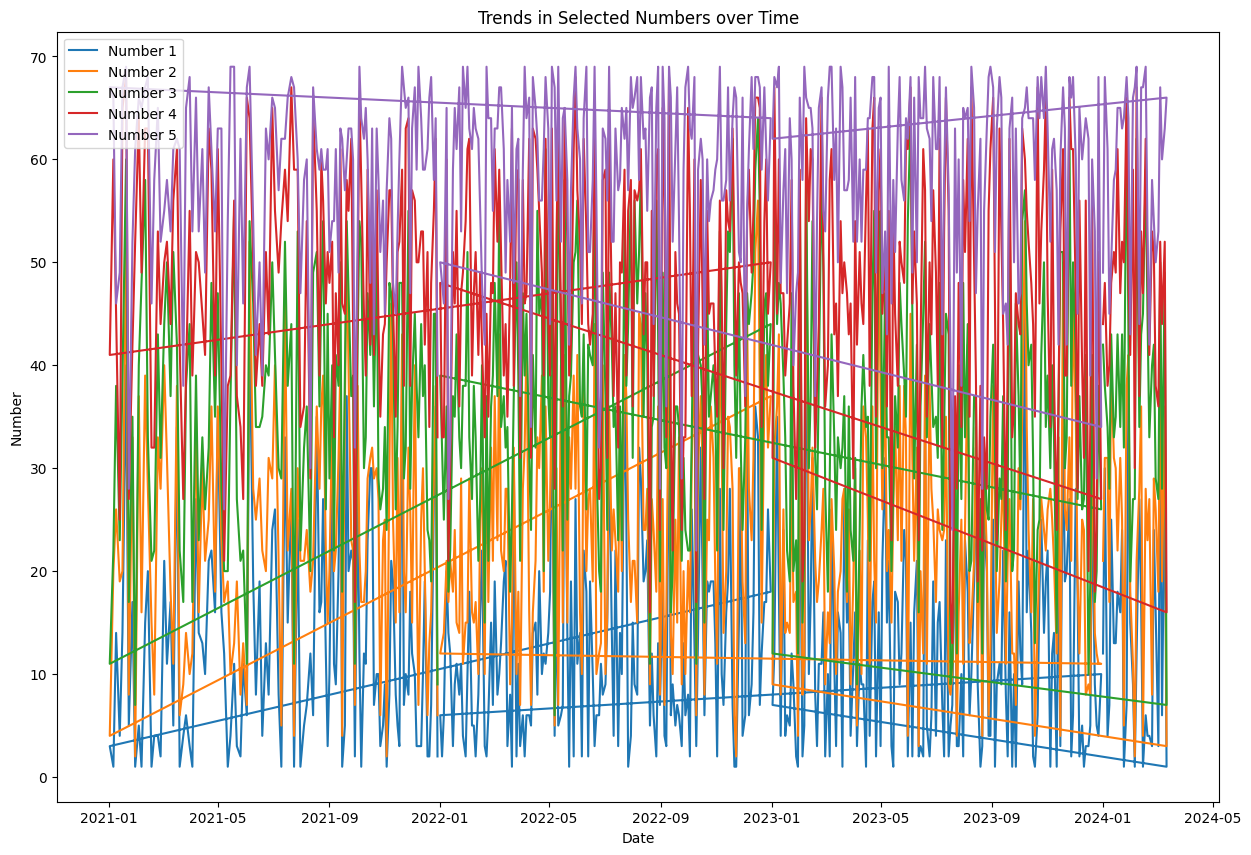

In [ ]:
# Time-series analysis
plt.figure(figsize=(15, 10))
for i in range(1, 6):
    plt.plot(data['date'], data[f'Number {i}'], label=f'Number {i}')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Trends in Selected Numbers over Time')
plt.legend()
plt.show()



In [ ]:
# Assuming 'data' is your DataFrame containing the time series data
# Combine all numbers into a single series
combination_data = data[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']].mean(axis=1)

# Train-test split
train_size = int(len(combination_data) * 0.8)
train, test = combination_data.iloc[:train_size], combination_data.iloc[train_size:]

# Train the SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 7)  # Seasonal order (assuming weekly seasonality)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Forecast future combinations
forecast = model_fit.forecast(steps=len(test))


In [ ]:
print(forecast)

373    33.691458
374    34.624476
375    33.355961
376    33.518488
377    35.341739
         ...    
462    32.843505
463    34.386461
464    32.718153
465    33.901851
466    32.641382
Name: predicted_mean, Length: 94, dtype: float64


In [ ]:
test

373    41.0
374    37.0
375    43.0
376    34.6
377    37.0
       ... 
462    41.2
463    27.4
464    33.6
465    43.0
466    33.6
Length: 94, dtype: float64

In [ ]:
# Reset index and convert index as column
data.reset_index(drop=False, inplace=True)


In [ ]:
data

,index,date,Day / Month / Year,Additional Numbers (1 - 26),Number 1,Number 2,Number 3,Number 4,Number 5
0,0,2021-12-29,Wednesday December 29th 2021,11,2,6,9,33,39
1,1,2021-12-27,Monday December 27th 2021,19,36,38,45,62,64
2,2,2021-12-25,Saturday December 25th 2021,2,27,29,45,55,58
3,3,2021-12-22,Wednesday December 22nd 2021,15,7,16,19,48,68
4,4,2021-12-20,Monday December 20th 2021,2,2,13,23,34,66
...,...,...,...,...,...,...,...,...,...
462,462,2024-01-10,Wednesday January 10th 2024,11,25,40,43,48,50
463,463,2024-01-08,Monday January 8th 2024,2,7,17,28,40,45
464,464,2024-01-06,Saturday January 6th 2024,13,4,31,34,38,61
465,465,2024-01-03,Wednesday January 3rd 2024,8,30,31,38,48,68


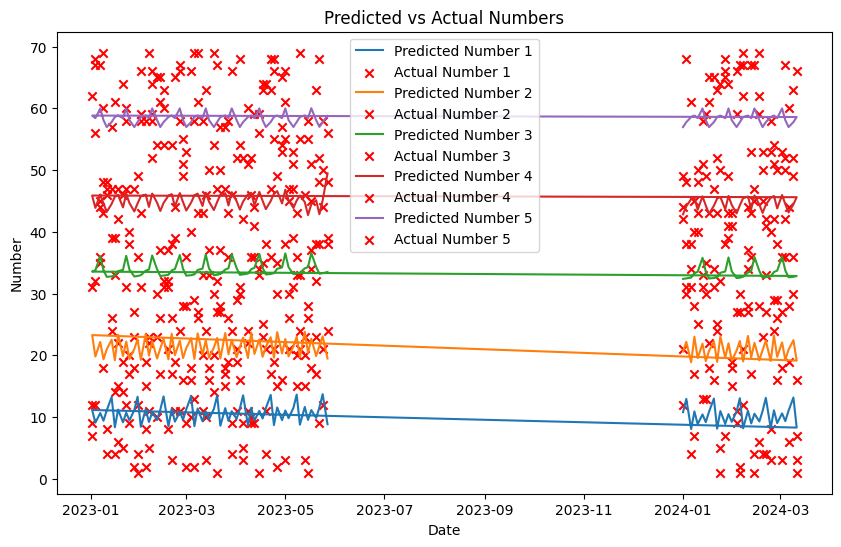

Mean Squared Error for Each Number:
{'Number 1': 116.2935331845685, 'Number 2': 141.59552578663826, 'Number 3': 157.51155683268675, 'Number 4': 127.97823689634217, 'Number 5': 68.34479877750816}


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt



# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Function to train SARIMA model and make predictions for each number
def train_and_predict(data, number_column):
    train_series = data[number_column][:train_size]
    test_series = data[number_column][train_size:]

    # Train the SARIMA model
    model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Make predictions
    predictions = model_fit.forecast(steps=len(test_series))
    return predictions

# Make predictions for each number
predictions = {}
for i in range(1, 6):
    number_column = f'Number {i}'
    predictions[number_column] = train_and_predict(data, number_column)

# Plot the predictions
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    number_column = f'Number {i}'
    plt.plot(test_data['date'], predictions[number_column], label=f'Predicted {number_column}')
    plt.scatter(test_data['date'], test_data[number_column], label=f'Actual {number_column}', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Predicted vs Actual Numbers')
plt.legend()
plt.show()

# Evaluate the predictions using Mean Squared Error
mse_values = {}
for i in range(1, 6):
    number_column = f'Number {i}'
    mse_values[number_column] = mean_squared_error(test_data[number_column], predictions[number_column])
print("Mean Squared Error for Each Number:")
print(mse_values)


In [ ]:
predictions

{'Number 1': 373     8.852168
 374    13.722145
 375    11.572060
 376     9.876131
 377    11.140019
          ...    
 462     8.865238
 463    10.924884
 464     8.073774
 465    12.949087
 466    10.803451
 Name: predicted_mean, Length: 94, dtype: float64,
 'Number 2': 373    19.490977
 374    23.077374
 375    21.530545
 376    19.892973
 377    22.693333
          ...    
 462    19.552454
 463    23.010923
 464    18.879395
 465    22.187799
 466    20.641209
 Name: predicted_mean, Length: 94, dtype: float64,
 'Number 3': 373    33.493552
 374    33.310725
 375    33.232485
 376    34.326391
 377    36.571353
          ...    
 462    33.525278
 463    33.300958
 464    32.595105
 465    32.460323
 466    32.384695
 Name: predicted_mean, Length: 94, dtype: float64,
 'Number 4': 373    49.471756
 374    45.083002
 375    42.853924
 376    45.112755
 377    44.461626
          ...    
 462    43.572689
 463    45.571562
 464    45.303443
 465    44.143326
 466    42.839301
 Name: 

# Most Probable Combination

<ipython-input-123-3a0a37614013>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['date'].dt.week
<ipython-input-123-3a0a37614013>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_combinations = grouped_by_month['Number 1','Number 2','Number 3','Number 4','Number 5','Additional Numbers (1 - 26)'].agg(lambda x: x.value_counts().index[0])
<ipython-input-123-3a0a37614013>:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_combinations = grouped_by_week['Number 1','Number 2','Number 3','Number 4','Number 5','Additional Numbers (1 - 26)'].agg(lambda x: x.value_counts().index[0])
<ipython-input-123-3a0a37614013>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated

<Axes: title={'center': 'Most Probable Combinations by Day of the Week'}, xlabel='day_of_week'>

<Figure size 640x480 with 0 Axes>

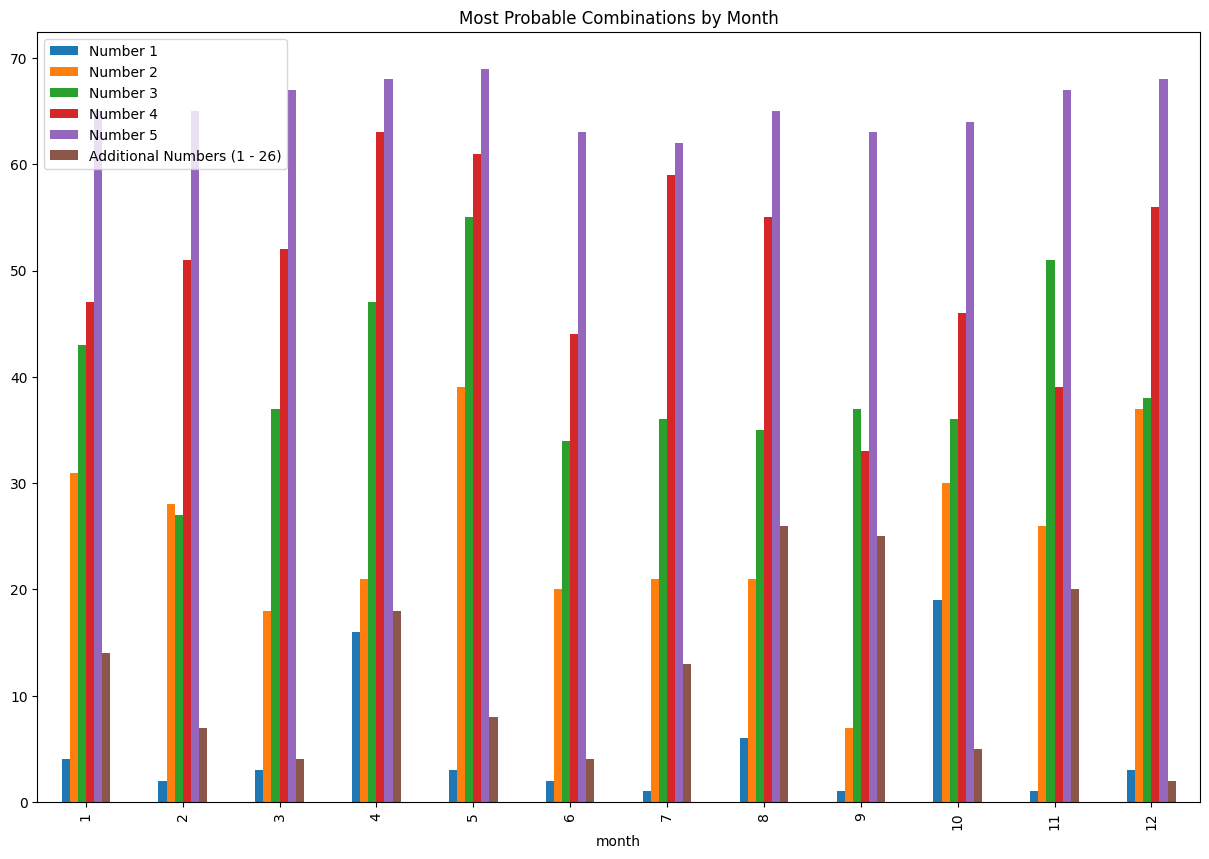

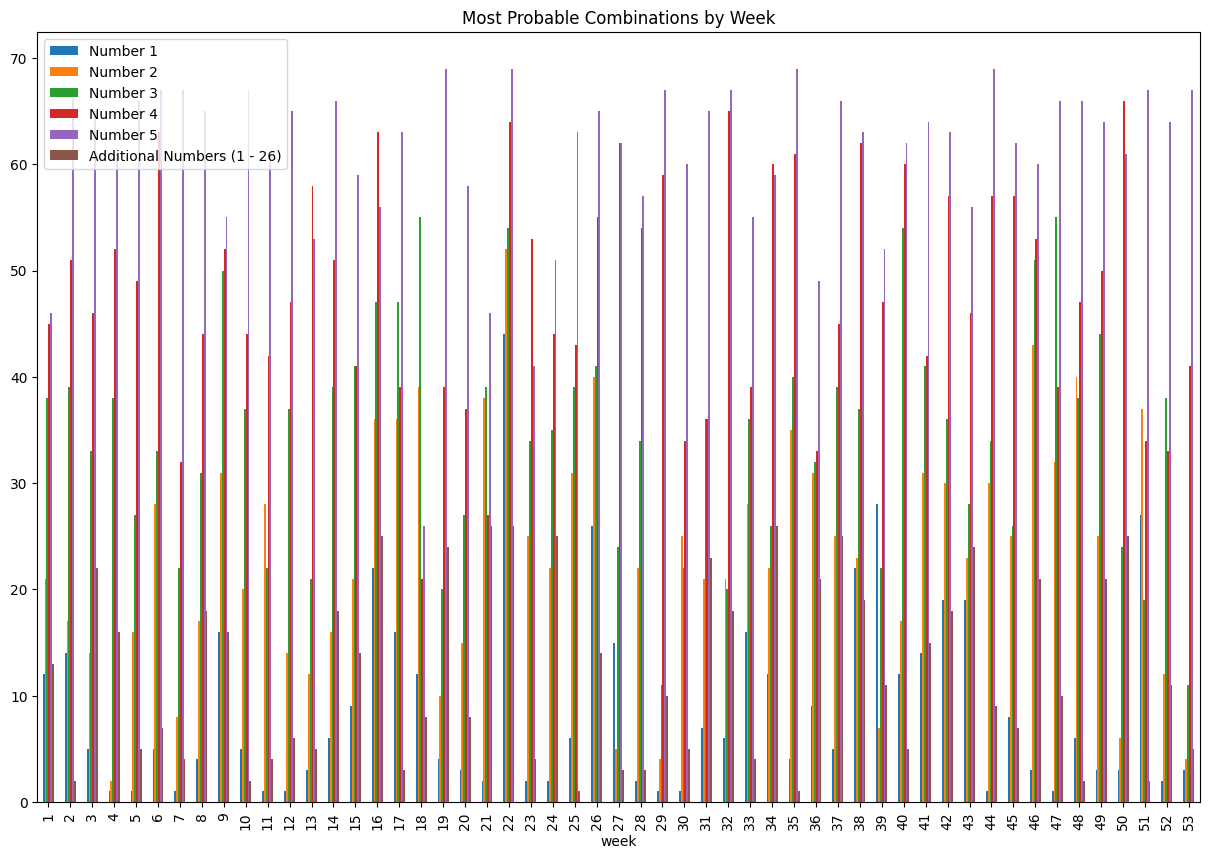

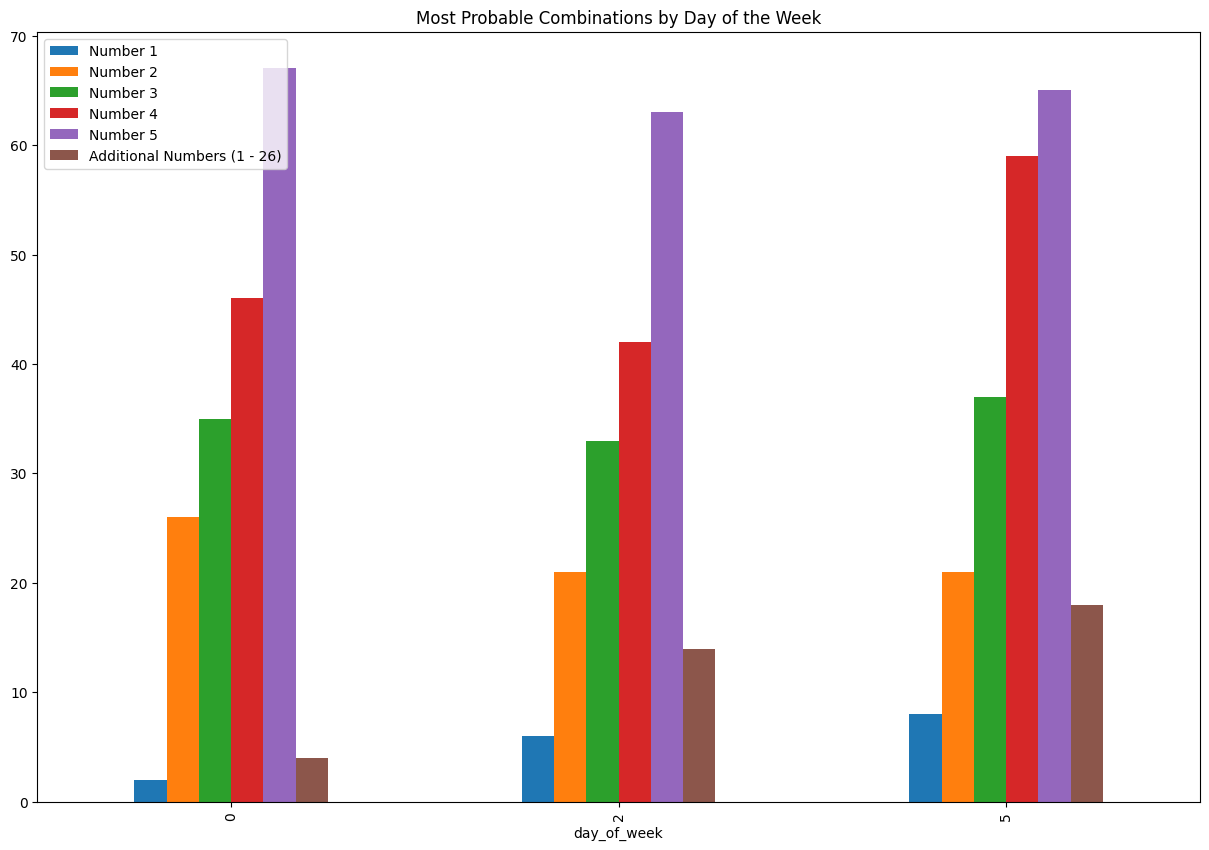

In [ ]:
import pandas as pd

# Load the data and convert the date column to datetime

data['date'] = pd.to_datetime(data['date'])

# Extract additional features: month, week number, and day of the week
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday
# Group the data by month, week, and day of the week
grouped_by_month = data.groupby('month')
grouped_by_week = data.groupby('week')
grouped_by_day = data.groupby('day_of_week')

# Calculate the frequency of each combination within each group
for i in range(1,6):
  monthly_combinations = grouped_by_month['Number 1','Number 2','Number 3','Number 4','Number 5','Additional Numbers (1 - 26)'].agg(lambda x: x.value_counts().index[0])
  weekly_combinations = grouped_by_week['Number 1','Number 2','Number 3','Number 4','Number 5','Additional Numbers (1 - 26)'].agg(lambda x: x.value_counts().index[0])
  daily_combinations = grouped_by_day['Number 1','Number 2','Number 3','Number 4','Number 5', 'Additional Numbers (1 - 26)'].agg(lambda x: x.value_counts().index[0])

# Visualize the most probable combinations
# (You can use different visualization techniques such as bar charts or heatmaps)
plt.figure()
monthly_combinations.plot(kind='bar', title='Most Probable Combinations by Month',figsize=(15,10))
weekly_combinations.plot(kind='bar', title='Most Probable Combinations by Week',figsize=(15,10))
daily_combinations.plot(kind='bar', title='Most Probable Combinations by Day of the Week',figsize=(15,10))


In [ ]:
data

,index,date,Day / Month / Year,Additional Numbers (1 - 26),Number 1,Number 2,Number 3,Number 4,Number 5,month,week,day_of_week
0,0,2021-12-29,Wednesday December 29th 2021,11,2,6,9,33,39,12,52,2
1,1,2021-12-27,Monday December 27th 2021,19,36,38,45,62,64,12,52,0
2,2,2021-12-25,Saturday December 25th 2021,2,27,29,45,55,58,12,51,5
3,3,2021-12-22,Wednesday December 22nd 2021,15,7,16,19,48,68,12,51,2
4,4,2021-12-20,Monday December 20th 2021,2,2,13,23,34,66,12,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,2024-01-10,Wednesday January 10th 2024,11,25,40,43,48,50,1,2,2
463,463,2024-01-08,Monday January 8th 2024,2,7,17,28,40,45,1,2,0
464,464,2024-01-06,Saturday January 6th 2024,13,4,31,34,38,61,1,1,5
465,465,2024-01-03,Wednesday January 3rd 2024,8,30,31,38,48,68,1,1,2


In [ ]:
data['day_of_week'].unique()

array([2, 0, 5])

# Most Probable Combination for Each Month

In [ ]:
monthly_combinations

,Number 1,Number 2,Number 3,Number 4,Number 5,Additional Numbers (1 - 26)
month,,,,,,
1,4,31,43,47,65,14
2,2,28,27,51,65,7
3,3,18,37,52,67,4
4,16,21,47,63,68,18
5,3,39,55,61,69,8
6,2,20,34,44,63,4
7,1,21,36,59,62,13
8,6,21,35,55,65,26
9,1,7,37,33,63,25


# Most Probable Combination for Each week of the year

In [ ]:
weekly_combinations

,Number 1,Number 2,Number 3,Number 4,Number 5,Additional Numbers (1 - 26)
week,,,,,,
1,12,21,38,45,46,13
2,14,17,39,51,67,2
3,5,14,33,46,65,22
4,1,2,38,52,61,16
5,1,16,27,49,66,5
6,5,28,33,63,67,7
7,1,8,22,32,67,4
8,4,17,31,44,65,18
9,16,31,50,52,55,16


## Most Probable Combination for each day of the week

In [ ]:
daily_combinations

,Number 1,Number 2,Number 3,Number 4,Number 5,Additional Numbers (1 - 26)
day_of_week,,,,,,
0,2,26,35,46,67,4
2,6,21,33,42,63,14
5,8,21,37,59,65,18


In [ ]:
print(grouped_by_month)

          Number 1  Number 2  Number 3  Number 4  Number 5
Number 1  1.000000  0.602132  0.422685  0.316127  0.113123
Number 2  0.602132  1.000000  0.724484  0.573347  0.273194
Number 3  0.422685  0.724484  1.000000  0.774903  0.434740
Number 4  0.316127  0.573347  0.774903  1.000000  0.578929
Number 5  0.113123  0.273194  0.434740  0.578929  1.000000


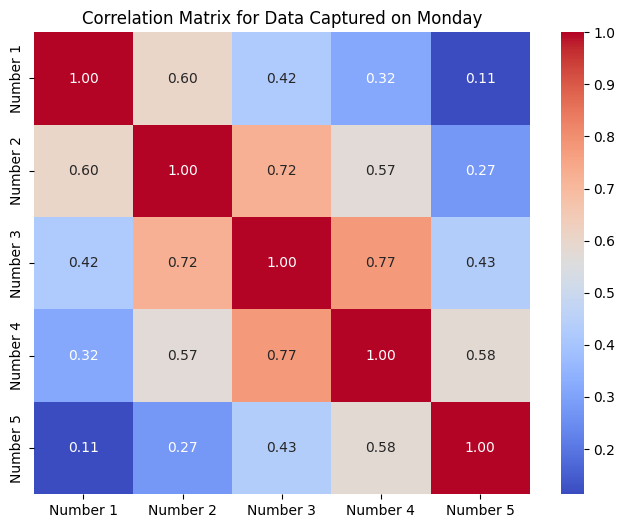

In [ ]:
data_for_monday=data[data['day_of_week']==0]

# Calculate correlations
correlation_matrix = data_for_monday[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']].corr()
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Data Captured on Monday')
plt.show()

          Number 1  Number 2  Number 3  Number 4  Number 5
Number 1  1.000000  0.745295  0.488586  0.392983  0.185626
Number 2  0.745295  1.000000  0.611665  0.464340  0.217439
Number 3  0.488586  0.611665  1.000000  0.723619  0.494964
Number 4  0.392983  0.464340  0.723619  1.000000  0.709736
Number 5  0.185626  0.217439  0.494964  0.709736  1.000000


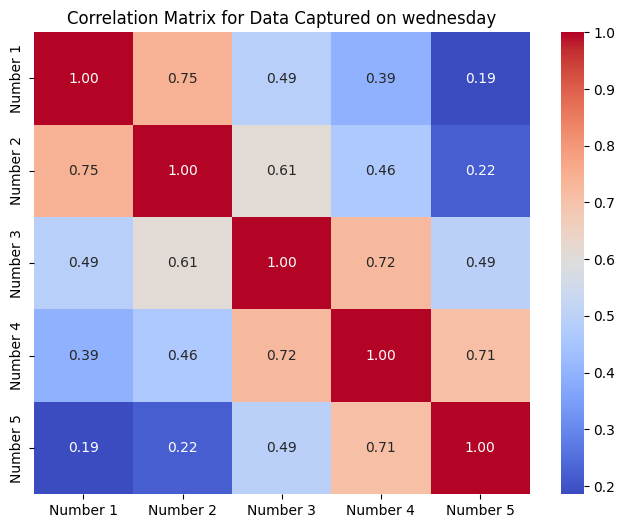

In [ ]:
data_for_wednesday=data[data['day_of_week']==2]

# Calculate correlations
correlation_matrix = data_for_wednesday[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']].corr()
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Data Captured on wednesday')
plt.show()

          Number 1  Number 2  Number 3  Number 4  Number 5
Number 1  1.000000  0.677635  0.450209  0.339965  0.190992
Number 2  0.677635  1.000000  0.690472  0.451463  0.242448
Number 3  0.450209  0.690472  1.000000  0.695266  0.384342
Number 4  0.339965  0.451463  0.695266  1.000000  0.634483
Number 5  0.190992  0.242448  0.384342  0.634483  1.000000


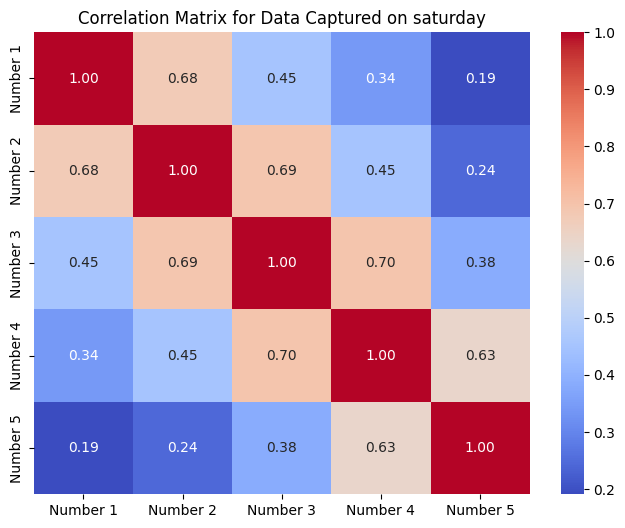

In [ ]:
data_for_saturday=data[data['day_of_week']==5]

# Calculate correlations
correlation_matrix = data_for_saturday[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5']].corr()
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Data Captured on saturday')
plt.show()